In [137]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import copy

In [138]:
def solvedCube(size):
    def initalizeFace(color):
            result = np.zeros((size, size))
            result.fill(color)
            return result
        
    build = []

    for i in range(6):
        build.append(initalizeFace(i))

    return np.array(build)

def mixCube(cube, amount):
    for i in range(amount):
        rand = random.randint(0, 1)
        if rand == 0:
            rand = random.randint(0, 1)
            if rand == 0:
                cube.turnCube(True)
            else:
                cube.turnCube(False)
        else:
            rand = random.randint(0, cube.size-1)
            cube.makeMove(rand)

def checkSolved(cube):
    def allEqual(face):
        res = np.all(face == face[0, 0])
        return res
    
    solved = True
    for i in range(6):
        if not allEqual(cube.cube[i]):
            solved = False
    return solved

In [139]:
class cube:
    def __init__(self, size):
        self.size = size
        self.cube = solvedCube(size)

        self.colors = {
                0: "white",
                1: "blue",
                2: "orange",
                3: "green",
                4: "red",
                5: "yellow"
            }

    def drawCube(self):
        #define Matplotlib figure and axis
        fig, ax = plt.subplots()
        
        #function to draw one of the faces
        def fillRect(x, y, val, face):
            ax.add_patch(Rectangle((x, y), .25, .25, facecolor = "white", edgecolor = "black"))
            for i in range(self.size):
                xVal = x + (.25 / self.size * i)
                for j in range(self.size):
                    yVal = y + (.25 / self.size * (self.size-j-1))
                    ax.add_patch(Rectangle((xVal, yVal), .25/self.size, .25/self.size, 
                                           facecolor = self.colors[face[j][i]]))

        #draw all the faces
        fillRect(.25, .25, 0, self.cube[0])
        fillRect(.25, 0, 1, self.cube[1])
        fillRect(.5, .25, 2, np.rot90(self.cube[2], k=1))
        fillRect(.25, .5, 3, np.rot90(self.cube[3], k=2))
        fillRect(0, .25, 4, np.rot90(self.cube[4], k=3))
        fillRect(.75, .25, 5, self.cube[5])

        plt.show()
    
    def makeMove(self, index):
        #rotates on the index couting from the top
        if index == 0:
            self.cube[0] = np.rot90(self.cube[0])
        elif index == self.size-1:
            self.cube[5] = np.rot90(self.cube[5], k=3)
        #in all cases make rotation at specified index
        temp = copy.copy(self.cube[4][index])
        self.cube[4][index] = self.cube[3][index]
        self.cube[3][index] = self.cube[2][index]
        self.cube[2][index] = self.cube[1][index]
        self.cube[1][index] = temp

    def turnCube(self, up):
        if up:
            #side rotations
            self.cube[0] = np.rot90(self.cube[0], k=2)
            self.cube[2] = np.rot90(self.cube[2], k=3)
            self.cube[4] = np.rot90(self.cube[4], k=1)
            self.cube[5] = np.rot90(self.cube[5], k=2)   
            #big rotate
            self.cube = np.array([self.cube[1], self.cube[5], self.cube[2], self.cube[0], self.cube[4], self.cube[3]])
        else:
            #turn left
            #side rotations
            self.cube[0] = np.rot90(self.cube[0], k=1)
            self.cube[1] = np.rot90(self.cube[1], k=1)
            self.cube[2] = np.rot90(self.cube[2], k=1)
            self.cube[3] = np.rot90(self.cube[3], k=3) 
            self.cube[4] = np.rot90(self.cube[4], k=3)
            self.cube[5] = np.rot90(self.cube[5], k=3)
            #big rotate
            self.cube = np.array([self.cube[2], self.cube[1], self.cube[5], self.cube[3], self.cube[0], self.cube[4]])

In [140]:
class RubixCubeEnv(Env):
    def __init__(self, size):
        self.action_space = Discrete(size+2)
        self.cubeSize = size
        self.cube = cube(size)
        self.observation_space = np.zeros((self.cube.cube.shape))

        mixCube(self.cube, 100)

        self.maxLength = 200
        self.length = 200

    def step(self, action):
        #perform action
        if action == 0:
            self.cube.turnCube(True)
        elif action == 1:
            self.cube.turnCube(False)
        else:
            self.cube.makeMove(action-2)

        done = False

        #check if cube is solved for rewards
        if checkSolved(self.cube):
            reward = 100
            done = True
        else:
            reward = -1

        #check if episode is over
        if self.length <= 0:
            done = True
        
        self.length -= 1

        info = {}

        return self.cube, reward, done, info

    def render(self):
        pass
    def reset(self):
        self.cube = cube(self.cubeSize)
        mixCube(self.cube, 100)
        self.length = self.maxLength
        print("Here", self.length)
        return self.cube

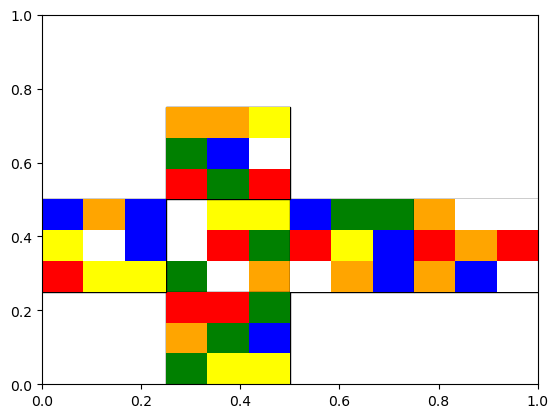

(6, 3, 3)


In [141]:
testCube = cube(3)
mixCube(testCube, 100)
testCube.drawCube()
print(testCube.cube.shape)

In [142]:
modelSize = 3
env = RubixCubeEnv(modelSize)

In [143]:
episodes = 10
for episode in range(episodes):
    state = env.reset()
    done = False
    score = 0
    count = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        curCube, reward, done, info = env.step(action)
        score += reward
        count + 1
    print(count)
    print("Episode: {} Score: {}".format(episode, score))
    

Here 200
0
Episode: 0 Score: -201
Here 200
0
Episode: 1 Score: -201
Here 200
0
Episode: 2 Score: -201
Here 200
0
Episode: 3 Score: -201
Here 200
0
Episode: 4 Score: -201
Here 200
0
Episode: 5 Score: -201
Here 200
0
Episode: 6 Score: -201
Here 200
0
Episode: 7 Score: -201
Here 200
0
Episode: 8 Score: -201
Here 200
0
Episode: 9 Score: -201


In [144]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten


In [145]:
def buildModel(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(6, modelSize, modelSize)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [146]:
del model

In [147]:
states = env.observation_space.shape
print(states)
actions = env.action_space.n
model = buildModel(states, actions)
model.summary()

(6, 3, 3)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 54)                0         
                                                                 
 dense_33 (Dense)            (None, 24)                1320      
                                                                 
 dense_34 (Dense)            (None, 24)                600       
                                                                 
 dense_35 (Dense)            (None, 5)                 125       
                                                                 
Total params: 2,045
Trainable params: 2,045
Non-trainable params: 0
_________________________________________________________________


In [148]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [149]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [150]:
dqn = build_agent(model, actions)
dqn.compile(tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

2024-01-13 14:54:59.398890: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_33/kernel/Assign' id:3350 op device:{requested: '', assigned: ''} def:{{{node dense_33/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_33/kernel, dense_33/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


AttributeError: 'Adam' object has no attribute '_name'